In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [30]:
retail=pd.read_csv('retail_data.csv',encoding='latin')

In [31]:
retail.shape

(229, 40)

In [32]:
retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
retail['Allocation Status'].value_counts()

Dealer    165
Direct     64
Name: Allocation Status, dtype: int64

In [34]:
retail=retail[retail['Allocation Status']=='Dealer']

In [35]:
retail.shape

(165, 40)

In [49]:
retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
retail['Status'].value_counts()

Lost    137
Won      28
Name: Status, dtype: int64

In [38]:
retail['Dealer Name'].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Rajtechnis    15
ITP           13
Pearlson       8
pearlson       7
Direct         4
Name: Dealer Name, dtype: int64

In [39]:
retail['Dealer Name']=retail['Dealer Name'].replace('pearlson','Pearlson')

In [44]:
retail['Dealer Name'].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Pearlson      15
Rajtechnis    15
ITP           13
Name: Dealer Name, dtype: int64

In [42]:
retail=retail[retail['Dealer Name']!='Direct']

In [43]:
retail.shape

(161, 40)

In [50]:
retail['Status'].value_counts()

Lost    135
Won      26
Name: Status, dtype: int64

In [58]:
df=pd.crosstab(retail['Dealer Name'],retail['Status'])
df.index

Index(['ITP', 'OXXO', 'Pearlson', 'Rajtechnis', 'Sunbird', 'Windoors',
       'Winfratech'],
      dtype='object', name='Dealer Name')

In [66]:
analysis=df.apply(lambda r:r/r.sum(),axis=1)

In [67]:
ordervalues=retail['Order Val. (Rs. Lac)'].groupby(by=retail['Dealer Name']).sum()

In [72]:
final=pd.concat([analysis,ordervalues],axis=1)

In [87]:
final

,Lost,Won,Order Val. (Rs. Lac)
Dealer Name,,,
ITP,1.000000,0.000000,0.00
OXXO,0.800000,0.200000,7.39
Pearlson,0.733333,0.266667,13.77
Rajtechnis,0.933333,0.066667,0.53
Sunbird,0.727273,0.272727,10.30
Windoors,0.866667,0.133333,11.54
Winfratech,0.900000,0.100000,2.11


In [88]:
retail['Order Val. (Rs. Lac)'].sum()

45.64

In [89]:
final['Order Val. (Rs. Lac)'].sum()

45.64

In [90]:
np.mean(final['Lost'])

0.8515151515151516

In [91]:
np.mean(final['Won'])

0.14848484848484847

In [93]:
np.mean(final['Order Val. (Rs. Lac)'])

6.5200000000000005

In [98]:
final['Lost']=final['Lost']*100

In [101]:
final['Won']=final['Won']*100

In [102]:
final

,Lost,Won,Order Val. (Rs. Lac)
Dealer Name,,,
ITP,100.000000,0.000000,0.00
OXXO,80.000000,20.000000,7.39
Pearlson,73.333333,26.666667,13.77
Rajtechnis,93.333333,6.666667,0.53
Sunbird,72.727273,27.272727,10.30
Windoors,86.666667,13.333333,11.54
Winfratech,90.000000,10.000000,2.11


In [105]:
final['Won']=np.round(final['Won'],2)

In [107]:
final['Lost']=np.round(final['Lost'],2)

In [108]:
final

,Lost,Won,Order Val. (Rs. Lac)
Dealer Name,,,
ITP,100.00,0.00,0.00
OXXO,80.00,20.00,7.39
Pearlson,73.33,26.67,13.77
Rajtechnis,93.33,6.67,0.53
Sunbird,72.73,27.27,10.30
Windoors,86.67,13.33,11.54
Winfratech,90.00,10.00,2.11


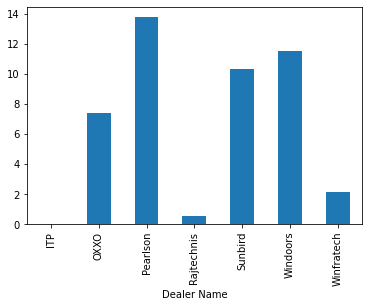

In [109]:
final['Order Val. (Rs. Lac)'].plot(kind='bar')

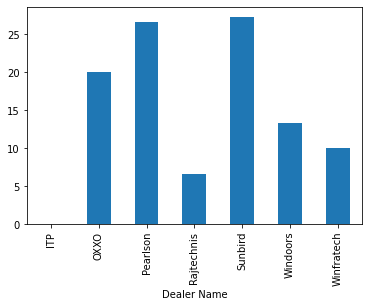

In [110]:
final['Won'].plot(kind='bar')

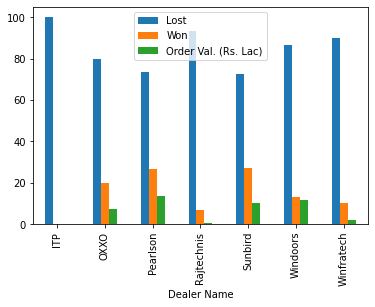

In [145]:
adv=pd.read_csv('Campaign Data.csv')

In [146]:
adv.shape

(4049, 3)

In [147]:
adv.head()

,Campaign id,Date,Click count
0,501,27-11-2018,1
1,501,4/12/2018,1
2,501,26-10-2018,1
3,501,25-10-2018,1
4,501,1/10/2018,1


In [152]:
adv.head()

,Campaign id,Date,Click count
0,501,27-11-2018,1
1,501,4/12/2018,1
2,501,26-10-2018,1
3,501,25-10-2018,1
4,501,1/10/2018,1


In [167]:
adv.head()

,Campaign id,Date,Click count,Day,Month,Year
0,501,27-11-2018,1,27,11,2018
1,501,4/12/2018,1,4/12/2018,None,None
2,501,26-10-2018,1,26,10,2018
3,501,25-10-2018,1,25,10,2018
4,501,1/10/2018,1,1/10/2018,None,None


In [170]:
adv['Date']=pd.to_datetime(adv["Date"])

In [190]:
adv.head()

,Campaign id,Date,Click count,Day,Month,Year
0,501,2018-11-27,1,27,11,2018
1,501,2018-04-12,1,12,4,2018
2,501,2018-10-26,1,26,10,2018
3,501,2018-10-25,1,25,10,2018
4,501,2018-01-10,1,10,1,2018


In [182]:
adv['Day']=adv['Date'].dt.day
adv['Month']=adv['Date'].dt.month
adv["Year"]=adv['Date'].dt.year

In [183]:
adv.head()

,Campaign id,Date,Click count,Day,Month,Year
0,501,2018-11-27,1,27,11,2018
1,501,2018-04-12,1,12,4,2018
2,501,2018-10-26,1,26,10,2018
3,501,2018-10-25,1,25,10,2018
4,501,2018-01-10,1,10,1,2018


In [221]:
adv.groupby('Month').sum()['Click count']

Month
1     1965376
2      119804
3      118874
4      123149
5      126290
6      121135
7      128858
8      229724
9     1298084
10    1265811
11     938306
12    1110302
Name: Click count, dtype: int64

In [202]:
monthlyclicks.min(),monthlyclicks.max()

(118874, 1965376)

we get that the minimum click is 118874 ,and that is done in 3rd Month
and the maximum clicks is 1965376 done in first month

In [217]:
adv.groupby(by='Year').sum()['Campaign id']

Year
2018    34106554
2019    12360295
Name: Campaign id, dtype: int64

In [218]:
adv['Campaign id'].unique

<bound method Series.unique of 0         501
1         501
2         501
3         501
4         501
        ...  
4044    14501
4045    14501
4046    14501
4047    14501
4048    14601
Name: Campaign id, Length: 4049, dtype: int64>

In [219]:
adv['Click count'].sum()

7545713

In [222]:
adv2019=adv[adv['Year']==2019]

In [223]:
adv2018=adv[adv['Year']==2018]

In [224]:
adv2019.describe()

,Campaign id,Click count,Day,Month,Year
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.0
mean,12189.640039,2339.052268,13.717949,3.251479,2019.0
std,2873.287914,5631.808150,11.182738,3.487797,0.0
min,2201.000000,1.000000,1.000000,1.000000,2019.0
25%,12503.000000,7.000000,1.000000,1.000000,2019.0
50%,13101.000000,598.000000,16.000000,1.000000,2019.0
75%,13502.000000,2489.250000,24.000000,5.000000,2019.0
max,14601.000000,96052.000000,31.000000,12.000000,2019.0


In [227]:
adv.groupby('Campaign id').sum()

,Click count,Day,Month,Year
Campaign id,,,,
501,15,146,62,18162
1001,4,37,23,8072
1002,1,10,1,2018
1003,1,26,10,2018
1401,5,47,27,10090
...,...,...,...,...
14301,82656,505,129,62584
14401,31930,442,70,46435
14402,54,219,35,24228


In [247]:
adv2019['Campaign id'].unique().shape

(56,)

In [250]:
adv2018['Campaign id'].unique().shape

(71,)

Thus we can say that their is a reduction of 15 campaigns from 2018 to 2019

In [254]:
a=adv2018['Campaign id'].unique()

In [255]:
b=adv2019["Campaign id"].unique()

In [277]:
c=list(filter(lambda x:x not in a,b))

In [278]:
c=np.array(c)

In [279]:
c.shape[0]

3

In [280]:
c

array([14402, 14501, 14601], dtype=int64)

The above two lines shows the count of campaigns and Ids which
are happening in 2019 but  not happened in 2018

In [283]:
d=list(filter(lambda x:x not in b,a))

In [284]:
d=np.array(d)

In [285]:
d.shape[0]

18

In [286]:
d

array([  501,  1001,  1002,  1003,  1401,  1402,  6005,  6006,  6007,
       10201, 13201, 13202, 13203, 13401, 13402, 13403, 13406, 13802],
      dtype=int64)

The above two cells give the campiagn ids which runs in 2018 but opted out in 2019

In [294]:
adv2019['Campaign id'].unique().shape[0],adv2018['Campaign id'].unique().shape[0]

(56, 71)

There are 56 campaigns in 2019 where as 71 campaigns in 2018

In [298]:
e=np.array(list(filter(lambda x:x in b,a)))
e.shape[0]

53

There are 53 campaigns that runs in both 2018 and 2019

In [300]:
adv.head()

,Campaign id,Date,Click count,Day,Month,Year
0,501,2018-11-27,1,27,11,2018
1,501,2018-04-12,1,12,4,2018
2,501,2018-10-26,1,26,10,2018
3,501,2018-10-25,1,25,10,2018
4,501,2018-01-10,1,10,1,2018


In [309]:
campaignclicks=adv.groupby('Campaign id').sum()["Click count"]

In [311]:
campaignclicks=pd.DataFrame(campaignclicks)

In [312]:
campaignclicks

,Click count
Campaign id,
501,15
1001,4
1002,1
1003,1
1401,5
...,...
14301,82656
14401,31930
14402,54


In [327]:
top5=campaignclicks['Click count'].sort_values(ascending=False).head(5)
top5

Campaign id
13003    923020
12502    895141
10901    683748
13502    416504
12501    412074
Name: Click count, dtype: int64

In [328]:
bottom5=campaignclicks['Click count'].sort_values().head(5)
bottom5

Campaign id
1002    1
1003    1
1402    1
6006    1
6007    2
Name: Click count, dtype: int64

The above 5 campaign ids can be given discount  since they have the maximum
click counts

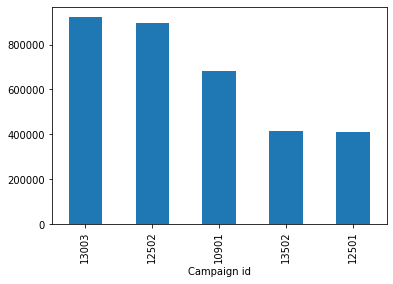

In [320]:
campaignclicks['Click count'].sort_values(ascending=False).head().plot(kind='bar')

In [324]:
total=pd.concat([top5,bottom5])

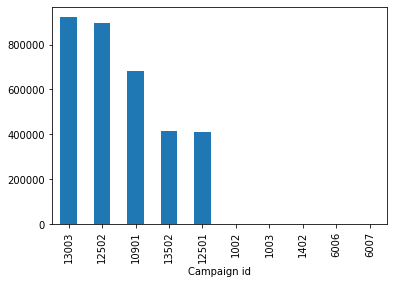

In [326]:
total.plot(kind='bar')

In [331]:
data=pd.DataFrame(adv.groupby(by=['Month','Campaign id']).sum()['Click count'])

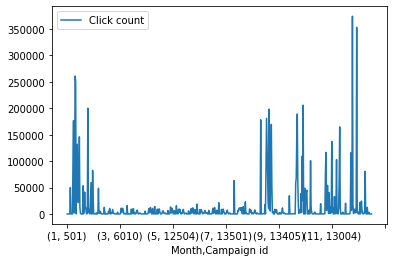

In [334]:
data.plot()

In [336]:
adv['Quarter']=adv['Date'].dt.quarter

In [338]:
adv.head(10)

,Campaign id,Date,Click count,Day,Month,Year,Quarter
0,501,2018-11-27,1,27,11,2018,4
1,501,2018-04-12,1,12,4,2018,2
2,501,2018-10-26,1,26,10,2018,4
3,501,2018-10-25,1,25,10,2018,4
4,501,2018-01-10,1,10,1,2018,1
5,501,2018-03-10,6,10,3,2018,1
6,501,2018-04-10,1,10,4,2018,2
7,501,2018-10-16,1,16,10,2018,4
8,501,2018-09-10,2,10,9,2018,3
9,1001,2018-04-09,1,9,4,2018,2
